In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# os.chdir("/content/drive/MyDrive/Colab Notebooks/Finpros/")

#  **1. Import required framework**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
import joblib

# **2. Loading data**

In [4]:
fpt_df = pd.read_csv('data/FPT.csv')

In [5]:
msn_df = pd.read_csv('data/MSN.csv')

In [6]:
pnj_df = pd.read_csv('data/PNJ.csv')

In [7]:
vic_df = pd.read_csv('data/VIC.csv')

In [8]:
print(fpt_df.shape)
print(msn_df.shape)
print(pnj_df.shape)
print(vic_df.shape)

(97406, 8)
(135354, 8)
(125309, 8)
(101266, 8)


In [9]:
fpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [10]:
msn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [11]:
pnj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB


In [12]:
vic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


=> Data is not null.

In [13]:
fpt_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [14]:
print(fpt_df.duplicated().sum())
print(msn_df.duplicated().sum())
print(pnj_df.duplicated().sum())
print(vic_df.duplicated().sum())

0
0
0
0


=> Data does not contain any duplicate value.

In [15]:
fpt_df['Date/Time'] = pd.to_datetime(fpt_df['Date/Time'])
msn_df['Date/Time'] = pd.to_datetime(msn_df['Date/Time'])
pnj_df['Date/Time'] = pd.to_datetime(pnj_df['Date/Time'])
vic_df['Date/Time'] = pd.to_datetime(vic_df['Date/Time'])


# **I think that we should build models for different Ticker, because each Ticker has separate trend and charateristic.**

# **3. Visualization**

In [16]:
def line_plot(df, x, y, title, xlabel, ylabel):
  plt.figure(figsize=(10, 5))
  lp = sns.lineplot(data=df, x=x, y=y)

  lp.set(xticklabels=[])
  lp.tick_params(bottom=False)

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show

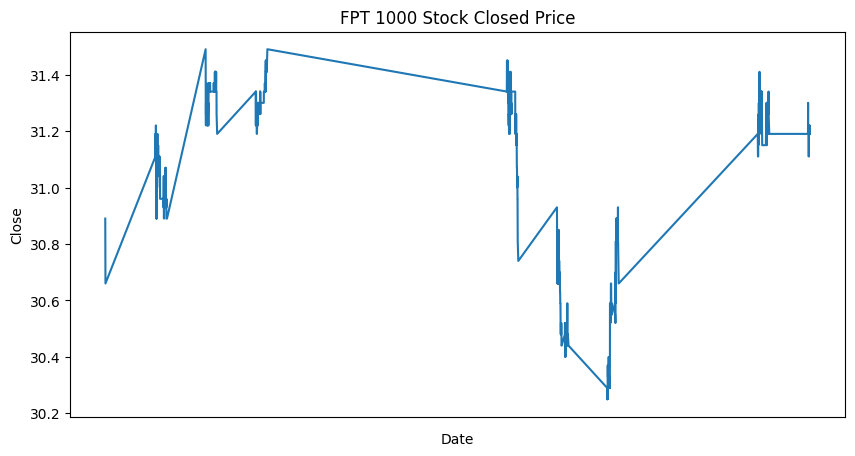

In [17]:
line_plot(fpt_df.iloc[:1000], 'Date/Time', 'Close', 'FPT 1000 Stock Closed Price', 'Date', 'Close')

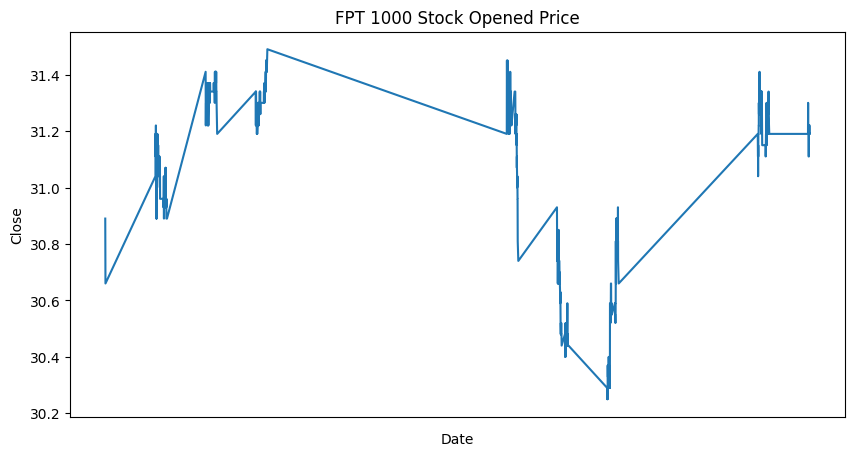

In [18]:
line_plot(fpt_df.iloc[:1000], 'Date/Time', 'Open', 'FPT 1000 Stock Opened Price', 'Date', 'Close')

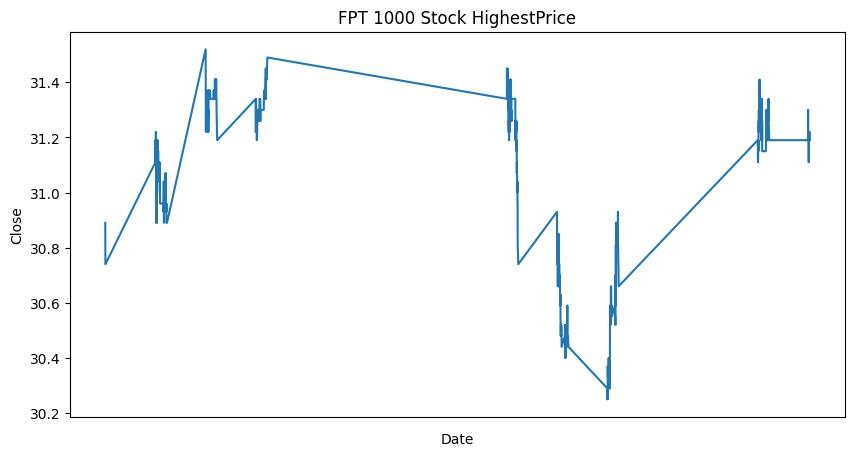

In [19]:
line_plot(fpt_df.iloc[:1000], 'Date/Time', 'High', 'FPT 1000 Stock HighestPrice', 'Date', 'Close')

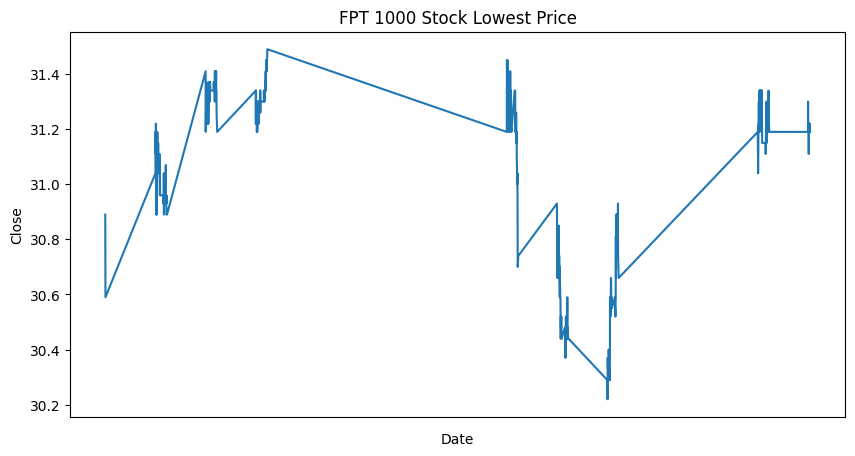

In [20]:
line_plot(fpt_df.iloc[:1000], 'Date/Time', 'Low', 'FPT 1000 Stock Lowest Price', 'Date', 'Close')

In [21]:
fpt_df[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999982,0.999980,0.999970
High,0.999982,1.000000,0.999968,0.999982
Low,0.999980,0.999968,1.000000,0.999980
Close,0.999970,0.999982,0.999980,1.000000


=> These features are almost similar.

**We need to create the price functuation column**

In [22]:
def create_target_column(df, shift, ok=False):
  df['Target'] = df['Close'].shift(shift) - (df['Close'] if ok else 0)
  return df

> => The function above is used to create the target column, `ok` is a params that make the target column be the price functuation if `ok`=True else the target column will be the  'future price'.

> `shift` is the `N` minutes provided in the task.

In [23]:
df1 = create_target_column(fpt_df.copy(deep=True), 30, True)

In [24]:
df2 = create_target_column(fpt_df.copy(deep=True), 30)

In [25]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [26]:
df1[['Open', 'High', 'Low', 'Close', 'Target']].corr()

,Open,High,Low,Close,Target
Open,1.000000,0.999981,0.999980,0.999970,-0.019123
High,0.999981,1.000000,0.999968,0.999981,-0.019526
Low,0.999980,0.999968,1.000000,0.999980,-0.019601
Close,0.999970,0.999981,0.999980,1.000000,-0.020169
Target,-0.019123,-0.019526,-0.019601,-0.020169,1.000000


In [27]:
df2[['Open', 'High', 'Low', 'Close', 'Target']].corr()

,Open,High,Low,Close,Target
Open,1.000000,0.999981,0.999980,0.999970,0.999012
High,0.999981,1.000000,0.999968,0.999981,0.999005
Low,0.999980,0.999968,1.000000,0.999980,0.999000
Close,0.999970,0.999981,0.999980,1.000000,0.998995
Target,0.999012,0.999005,0.999000,0.998995,1.000000


> You can see that `df2` has high correllation between `Target` and our features. I think that is very good for our prediction, so I will choose the second method to create the target column, which has `ok = False`

In [28]:
fpt_df = create_target_column(fpt_df, 30, False)
fpt_df.dropna(inplace=True)

# **4. Using model to predict**

In [29]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [30]:
feature = ['Open', 'High', 'Low', 'Volume', 'Close', 'Open Interest']
target = 'Target'


In [31]:
def get_X_y_scaled(df, feature, target, scaler):
  X = fpt_df[feature]
  y = fpt_df[target]

  print(y.mean())

  scaler = StandardScaler()

  X = scaler.fit_transform(X)
  y = scaler.fit_transform(y.values.reshape(-1, 1))
  return X, y, scaler

def time_split_data(df, feature, target, scaler):
  X, y, scaler = get_X_y_scaled(df, feature, target, scaler)
  tscv = TimeSeriesSplit(n_splits=5)
  for train_index, test_index in tscv.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
  return X_train, X_test, y_train, y_test, scaler

In [32]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test, scaler = time_split_data(fpt_df, feature, target, scaler)

45.06759139829116


In [33]:
def train(model, X_train, y_train):
  model.fit(X_train, y_train)
  return model

def predict(model, X_train, X_test, y_train, y_test):
  model = train(model, X_train, y_train)
  return model.predict(X_test)

def get_score(model, X_train, X_test, y_train, y_test):
  model = train(model, X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  return model.score(X_test, y_test), rmse, model

In [34]:
model1 = LinearRegression()
# model2 = SVR(kernel='linear', C=100, gamma=0.1)



In [35]:
_, rmse, model1 = get_score(model1, X_train, X_test, y_train, y_test)
print('===> LR RMSE:', rmse)

===> LR RMSE: 0.042722266117644986


**Can we do it better?**

=> Use Long - Short Term Memory model (LTSM - RNN) to predict this time series problem.

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [37]:
X_train_tensors = torch.Tensor(X_train)
X_test_tensors = torch.Tensor(X_test)
y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)

In [38]:
train_dataset = TensorDataset(X_train_tensors, y_train_tensors)
test_dataset = TensorDataset(X_test_tensors, y_test_tensors)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [39]:
def get_data_loader(X_train, X_test, y_train, y_test):
  X_train_tensors = torch.Tensor(X_train)
  X_test_tensors = torch.Tensor(X_test)
  y_train_tensors = torch.Tensor(y_train)
  y_test_tensors = torch.Tensor(y_test)

  train_dataset = TensorDataset(X_train_tensors, y_train_tensors)
  test_dataset = TensorDataset(X_test_tensors, y_test_tensors)

  train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

  return train_loader, test_loader

**Build LSTM model**

In [40]:
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # h0 = torch.zeros(self.num_layers, self.hidden_size).to(x.device)
        # c0 = torch.zeros(self.num_layers, self.hidden_size).to(x.device)
        # print(h0.dim(), c0.dim())
        out, _ = self.lstm(x)
        # print(out.size())
        out = self.fc(out)
        return out

input_size = X_train.shape[1]
hidden_size = 50
num_layers = 2
output_size = 1

model2 = StockLSTM(input_size, hidden_size, num_layers, output_size)


In [41]:
def train_lstm(device, model, train_loader, epochs, lr):
    model.to(device)
    # Define Loss Function and Optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training model
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            # print(X_batch.size())
            outputs = model(X_batch)
            # print(outputs.size())
            # print(y_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


In [42]:
def get_score_lstm(model, train_loader, test_loader):    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # Train
    train_lstm(device, model, train_loader, epochs=30, lr=0.001)
    
    
    # Predict
    model.eval()
    y_pred = []
    with torch.no_grad():
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            y_pred.append(outputs.cpu().numpy())

    y_pred = np.concatenate(y_pred)

    # print(y_pred.shape)
    # print(y_test.shape)

    # y_pred = scaler.inverse_transform(y_pred)
    # y_test = scaler.inverse_transform(y_test)

    # Evaluate LSTM model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse, model

In [43]:
score, model2 = get_score_lstm(model2, train_loader, test_loader)
print('\n\n===> LSTM RMSE:', score)

Epoch [1/30], Loss: 0.0034
Epoch [2/30], Loss: 0.0015
Epoch [3/30], Loss: 0.0011
Epoch [4/30], Loss: 0.0023
Epoch [5/30], Loss: 0.0021
Epoch [6/30], Loss: 0.0015
Epoch [7/30], Loss: 0.0020
Epoch [8/30], Loss: 0.0012
Epoch [9/30], Loss: 0.0013
Epoch [10/30], Loss: 0.0021
Epoch [11/30], Loss: 0.0012
Epoch [12/30], Loss: 0.0014
Epoch [13/30], Loss: 0.0021
Epoch [14/30], Loss: 0.0016
Epoch [15/30], Loss: 0.0028
Epoch [16/30], Loss: 0.0020
Epoch [17/30], Loss: 0.0016
Epoch [18/30], Loss: 0.0043
Epoch [19/30], Loss: 0.0013
Epoch [20/30], Loss: 0.0009
Epoch [21/30], Loss: 0.0038
Epoch [22/30], Loss: 0.0012
Epoch [23/30], Loss: 0.0011
Epoch [24/30], Loss: 0.0013
Epoch [25/30], Loss: 0.0020
Epoch [26/30], Loss: 0.0009
Epoch [27/30], Loss: 0.0014
Epoch [28/30], Loss: 0.0024
Epoch [29/30], Loss: 0.0017
Epoch [30/30], Loss: 0.0016


===> LSTM RMSE: 0.18338172216727427


> => This model is not as good as LinearRegression.

# **5. Feature exploration**

## 5.1 Moving average (MA)
- MA is the average price of votes over a certain period of time. Typically, there is a short-term MA limit (e.g. 5 days) and a long-term MA limit (e.g. 50 days).

In [44]:
def MA(df, window):
    return df.rolling(window=window).mean()

fpt_df['MA_5'] = MA(fpt_df['Close'], 5)
fpt_df['MA_50'] = MA(fpt_df['Close'], 50)

## 5.2 Relative Strength Index (RSI)
- RSI is an oscillator that measures the speed and change of price movements. It fluctuates between 0 and 100.

In [45]:
def rsi(df, window):
    delta = df.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

fpt_df['RSI_14'] = rsi(fpt_df['Close'], 14)


## 5.3 Moving Average Convergence Divergence (MACD)
- MACD is the difference between two EMA (Exponential Moving Average) lines with different time periods.

In [46]:
def ema(df, window):
    return df.ewm(span=window, adjust=False).mean()

fpt_df['EMA_12'] = ema(fpt_df['Close'], 12)
fpt_df['EMA_26'] = ema(fpt_df['Close'], 26)
fpt_df['MACD'] = fpt_df['EMA_12'] - fpt_df['EMA_26']
fpt_df['Signal_Line'] = ema(fpt_df['MACD'], 9)


In [47]:
fpt_df.dropna(inplace=True)

# **6. Rebuild models**

In [48]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest', 'MA_5', 'MA_50', 'RSI_14', 'MACD', 'Signal_Line']

X_train, X_test, y_train, y_test, scaler = time_split_data(fpt_df, features, target, scaler)

45.073267228351995


In [49]:
_, rmse, model1 = get_score(model1, X_train, X_test, y_train, y_test)
print('===> LR RMSE:', rmse)

===> LR RMSE: 0.015194278116605653


In [50]:
input_size = X_train.shape[1]
model2 = StockLSTM(input_size, hidden_size, num_layers, output_size)

train_loader, test_loader = get_data_loader(X_train, X_test, y_train, y_test)

score, model2 = get_score_lstm(model2, train_loader, test_loader)
print('\n\n===> LSTM RMSE:', score)

Epoch [1/30], Loss: 0.0004
Epoch [2/30], Loss: 0.0003
Epoch [3/30], Loss: 0.0005
Epoch [4/30], Loss: 0.0001
Epoch [5/30], Loss: 0.0002
Epoch [6/30], Loss: 0.0004
Epoch [7/30], Loss: 0.0002
Epoch [8/30], Loss: 0.0007
Epoch [9/30], Loss: 0.0003
Epoch [10/30], Loss: 0.0002
Epoch [11/30], Loss: 0.0002
Epoch [12/30], Loss: 0.0003
Epoch [13/30], Loss: 0.0002
Epoch [14/30], Loss: 0.0004
Epoch [15/30], Loss: 0.0004
Epoch [16/30], Loss: 0.0007
Epoch [17/30], Loss: 0.0002
Epoch [18/30], Loss: 0.0004
Epoch [19/30], Loss: 0.0001
Epoch [20/30], Loss: 0.0002
Epoch [21/30], Loss: 0.0003
Epoch [22/30], Loss: 0.0002
Epoch [23/30], Loss: 0.0003
Epoch [24/30], Loss: 0.0002
Epoch [25/30], Loss: 0.0004
Epoch [26/30], Loss: 0.0002
Epoch [27/30], Loss: 0.0002
Epoch [28/30], Loss: 0.0003
Epoch [29/30], Loss: 0.0003
Epoch [30/30], Loss: 0.0002


===> LSTM RMSE: 0.13672928315054486


# **7. Conclusion**

In [51]:
joblib.dump(scaler, 'scaler.pkl')
torch.save(model2, 'model1.pth')

- Best model: `model1` (LinearRegression)
- Step to predict: 
    - Scale input
    - Create MA, RSI, MACD
    - Load model
    - Predict

**Create function to get prediction from new data**

In [63]:
def get_prediction(model, dataset, scaler, newdata):
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest', 'MA_5', 'MA_50', 'RSI_14', 'MACD', 'Signal_Line']
    target = 'Target'
    
    data = pd.concat([dataset, newdata])
    data.to_csv('data/data.csv', index=False)
    
    data = create_target_column(data, 30, False)
    data['MA_5'] = MA(data['Close'], 5)
    data['MA_50'] = MA(data['Close'], 50)
    data['RSI_14'] = rsi(data['Close'], 14)
    data['EMA_12'] = ema(data['Close'], 12)
    data['EMA_26'] = ema(data['Close'], 26)
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal_Line'] = ema(data['MACD'], 9)
    
    data.dropna(inplace=True)
    
    input = data[features]
    output = data[target]
    
    input = scaler.fit_transform(input)
    output = scaler.fit_transform(output.values.reshape(-1, 1))
    
    input = torch.Tensor(input)
    
    input = input[-1].reshape(1, -1)
    model.eval()
    with torch.no_grad():
        output = model(input)
    price_after_30m = scaler.inverse_transform(output.numpy())[0][0]
     
    functuation = price_after_30m - newdata['Close'].iloc[-1]

    print('The price functuation after 30 minutes is:', functuation)

In [64]:
dict_data = {
    'Ticker': 'FPT',
    'Date/Time': '12/22/2020 14:47',
    'Open': 58.2,
    'High': 58.21,
    'Low': 58.19,
    'Close': 58.2,
    'Volume': 100000,
    'Open Interest': 0
}

model = torch.load('model1.pth')
scaler = joblib.load('scaler.pkl')

newdata = pd.DataFrame(dict_data, index=[0])
dataset = pd.read_csv('data/FPT.csv')

get_prediction(model, dataset, scaler, newdata)


The price functuation after 30 minutes is: -3.770125579833987
